In [228]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [229]:
# read boston housing dataset into a list
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [230]:
boston_dataset.items()

dict_items([('data', array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])), ('target', array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6,

In [231]:
X = boston_dataset['data'].T
y = boston_dataset['target'].T


In [232]:
X[:, 0].tolist()

[0.00632,
 18.0,
 2.31,
 0.0,
 0.538,
 6.575,
 65.2,
 4.09,
 1.0,
 296.0,
 15.3,
 396.9,
 4.98]

In [233]:
# normalizing the data array is very important! otherwise the weights explode during training
X = (X.T - np.mean(X ,axis=1)) / np.std(X, axis=1)
X = X.T
X[:,0].tolist()

[-0.4197819386460084,
 0.2848298609673567,
 -1.2879094989577484,
 -0.2725985670699254,
 -0.14421743255530006,
 0.4136718893017465,
 -0.1200134161980508,
 0.1402136034929299,
 -0.9828428567665046,
 -0.6666082090210975,
 -1.4590003802772087,
 0.44105193260704206,
 -1.075562304567866]

In [234]:
xdim = X.shape[0]
ydim = 1

In [235]:
w = np.zeros((ydim, xdim))
b = np.zeros(ydim)

In [236]:
def predict(w, b, X):
    return np.dot(w, X) + b

def calculate_loss(w, b, X, y):
    return np.mean(np.square(predict(w, b, X) - y))

In [237]:
pred = predict(w, b, X)
pred.shape

(1, 506)

In [238]:
y.shape

(506,)

In [239]:
loss = calculate_loss(w, b, X, y)
loss

592.1469169960474

In [240]:
r = (predict(w, b, X) - y) / len(y)
del_w = (2*r) @ (X.T)
del_b = np.sum(2*r)
del_w.tolist()

[[7.135494453560721,
  -6.623551935754725,
  8.888944710164623,
  -3.2205850629039126,
  7.852456380205706,
  -12.777950443634154,
  6.926925790615148,
  -4.592696188556138,
  7.0127724261985485,
  8.609827133996669,
  9.331099858515774,
  -6.1276837218145115,
  13.555307289216518]]

In [241]:
def grad_W(r, X):
    return (2*r) @ (X.T)

def grad_B(r):
    return np.sum(2*r)

In [242]:
def sgdupdate(w, b, X, y):
    loss = calculate_loss(w, b, X, y)
    r = (predict(w, b, X) - y) / len(y)
    w -= 0.1 * grad_W(r, X)
    b -= 0.1 * grad_B(r)
    return loss


In [243]:
w = np.zeros((ydim, xdim))
b = np.zeros(ydim)

Text(0, 0.5, 'mean_sq_loss')

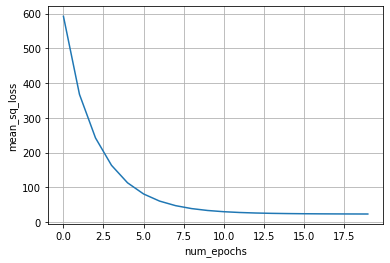

In [244]:
plt.plot([sgdupdate(w, b, X, y) for _ in range(20)])
plt.grid()
plt.xlabel("num_epochs")
plt.ylabel("mean_sq_loss")

In [262]:
print(f'{np.round((np.dot(w, X) + b)[0, :5], 1)}\n{y[:5]}')

[30.4 24.8 30.8 29.3 28.8]
[24.  21.6 34.7 33.4 36.2]
